# **Final Projects 2 - Logistic Regression and SVM**

Name: Sarah Aristawidya

Class: PYTN-KS19

# **Introduction**
<hr>

## Background

With the "Weather AUS" dataset, this project aims to understand and forecast the weather conditions in Australia, specifically focusing on predicting rain tomorrow. Australia often experiences significant weather variations, and the ability to predict rain has a major impact on various aspects of daily life, such as agriculture, outdoor activities, and disaster risk management.

By using logistic regression and support vector machine (SVM) models, this analysis explores how machine learning methods can be applied to understand weather patterns. The focus is not only on the model's accuracy but also on its ability to handle imbalances in the data and provide reliable predictions to support decision-making.

From the analysis results, it is expected that this project can provide valuable insights into the effectiveness of models in the context of weather prediction in Australia. The conclusions and recommendations from this project could serve as a basis for the development of early warning systems or more reliable weather applications in the future.

## Overview

**Outline Notebook**
1. Perkenalan
2. Import Libraries
3. Data Loading
4. Data Cleaning
5. Explorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Pengambilan Kesimpulan


**Project Overview**

Database ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia, kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih.

**Attribute Information:**
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediks

**Objektif**
Final Project 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM
sebagai berikut:
* Mampu memahami konsep Classification dengan Logistic Regression dan SVM
* Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
* Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

**Dataset Link** : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/

# **Import Libraries**
<hr>

In [1]:
# Import library yang dibutuhkan
# Data cleaning and manipulation 
import pandas as pd
import numpy as np
from scipy import stats


# Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as tick

# Data Exploration
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

# For Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn import svm
from sklearn.svm import SVC

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

# **Data Loading**
Data loading is the process of acquiring, importing, or retrieving data from various sources 
<hr>
Load Data: Reading a CSV file into a DataFrame using the pandas library.

In [2]:
data = pd.read_csv('weatherAUS.csv')

# Show 5 data head and tail
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

Creating a copy of the original data by defining it as 'df' to ensure the original data.

In [3]:
df = data.copy()
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [4]:
# Show how many rows and columns in dataset
df.shape

(145460, 23)

In [5]:
# View dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## DType Description

1. **int64:** This data type is used to store integer numbers in a 64-bit format.
2. **object:** This data type is used to store objects or data types that do not fall under numeric or date and time data types.
3. **category:** This data type is a special type used to store categorical or factor data.
4. **float64:** This data type is used to store decimal numbers in a 64-bit format.
5. **datetime64[ns]:** This data type is used to store date and time data with nanosecond precision (10^-9 seconds). It is a useful data type for date and time-related data, such as transaction dates or observation times.

# **Data Cleaning**
Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, inaccuracies, and incomplete parts from a dataset. 
<hr>

In [6]:
# Show 5 column from the top 
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [7]:
# Check the number of missing values in the dataset
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Because in this project we did not conduct a time series analysis, the 'date' column above can be deleted.

In [8]:
# Date feature can be drop because this isn't a time series analysis
df.drop("Date", axis=1, inplace=True)

## Replace Missing Value
Address missing or unavailable values in your dataset.

Columns containing **numeric data** can be handled using `mean or median` as an appropriate approach to deal with numeric data with missing values. Using the mean can help maintain the overall distribution of the data, while using the median is a robust approach that is less sensitive to outliers.

In [9]:
# Filling missing values with mean
num_cols = df.columns[df.dtypes != object]

print("\nNumerical Columns")
for i in num_cols:
    mean_value = df[i].mean()
    df[i].fillna(mean_value, inplace=True)
    print(f"NaN values in {i} have been replaced by {mean_value}")


Numerical Columns
NaN values in MinTemp have been replaced by 12.19403438096892
NaN values in MaxTemp have been replaced by 23.22134827564685
NaN values in Rainfall have been replaced by 2.3609181499166656
NaN values in Evaporation have been replaced by 5.468231522922462
NaN values in Sunshine have been replaced by 7.6111775206611565
NaN values in WindGustSpeed have been replaced by 40.03523007167319
NaN values in WindSpeed9am have been replaced by 14.043425914971502
NaN values in WindSpeed3pm have been replaced by 18.662656778887342
NaN values in Humidity9am have been replaced by 68.88083133761887
NaN values in Humidity3pm have been replaced by 51.5391158755046
NaN values in Pressure9am have been replaced by 1017.6499397983052
NaN values in Pressure3pm have been replaced by 1015.2558888309618
NaN values in Cloud9am have been replaced by 4.4474612602152455
NaN values in Cloud3pm have been replaced by 4.509930082924903
NaN values in Temp9am have been replaced by 16.990631415587398
NaN 

In [10]:
# Check the number of missing values in the dataset
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [11]:
# Delete missing values in 'WindGustDir','WindDir9am','WindDir3pm','RainToday', and'RainTomorrow'
df.dropna(subset=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'], axis=0, inplace=True)

In [12]:
# View dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    123710 non-null  float64
 5   Sunshine       123710 non-null  float64
 6   WindGustDir    123710 non-null  object 
 7   WindGustSpeed  123710 non-null  float64
 8   WindDir9am     123710 non-null  object 
 9   WindDir3pm     123710 non-null  object 
 10  WindSpeed9am   123710 non-null  float64
 11  WindSpeed3pm   123710 non-null  float64
 12  Humidity9am    123710 non-null  float64
 13  Humidity3pm    123710 non-null  float64
 14  Pressure9am    123710 non-null  float64
 15  Pressure3pm    123710 non-null  float64
 16  Cloud9am       123710 non-null  float64
 17  Cloud3pm       123710 non-nul

In [13]:
# Viewing statistical data
df.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  123710.000000  123710.000000  123710.000000  123710.000000   
mean       12.413917      23.474808       2.375661       5.551665   
std         6.366792       7.205898       8.528039       3.245612   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.800000      18.100000       0.000000       4.200000   
50%        12.200000      23.000000       0.000000       5.468232   
75%        17.000000      28.600000       0.800000       5.600000   
max        33.900000      48.100000     367.600000      86.200000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  123710.000000  123710.000000  123710.000000  123710.000000   
mean        7.669315      40.685280      15.011689      19.174578   
std         2.782271      13.388636       8.307285       8.571039   
min         0.000000       7.000000       2.000000       2.000000   
25%         7.611178      31.000000       9.000000      13.000000   
50%         7.611178      39.000000      13.000000      19.000000   
75%         9.000000      48.000000      20.000000      24.000000   
max        14.500000     135.000000      87.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  123710.000000  123710.000000  123710.000000  123710.000000   
mean       67.664315      50.856904    1017.416706    1015.029505   
std        18.975503      20.839568       6.765690       6.703817   
min         0.000000       0.000000     980.500000     977.100000   
25%        56.000000      36.000000    1013.200000    1010.700000   
50%        68.880831      51.539116    1017.649940    1015.255889   
75%        81.000000      65.000000    1021.700000    1019.300000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  
count  123710.000000  123710.000000  123710.000000  123710.000000  
mean        4.422374       4.498630      17.268860      21.895705  
std         2.280965       2.124822       6.477882       7.005865  
min         0.000000       0.000000      -7.200000      -5.400000  
25%         3.000000       4.000000      12.500000      16.800000  
50%         4.447461       4.509930      16.990631      21.500000  
75%         6.000000       6.000000      21.900000      26.700000  
max         9.000000       9.000000      40.200000      46.700000

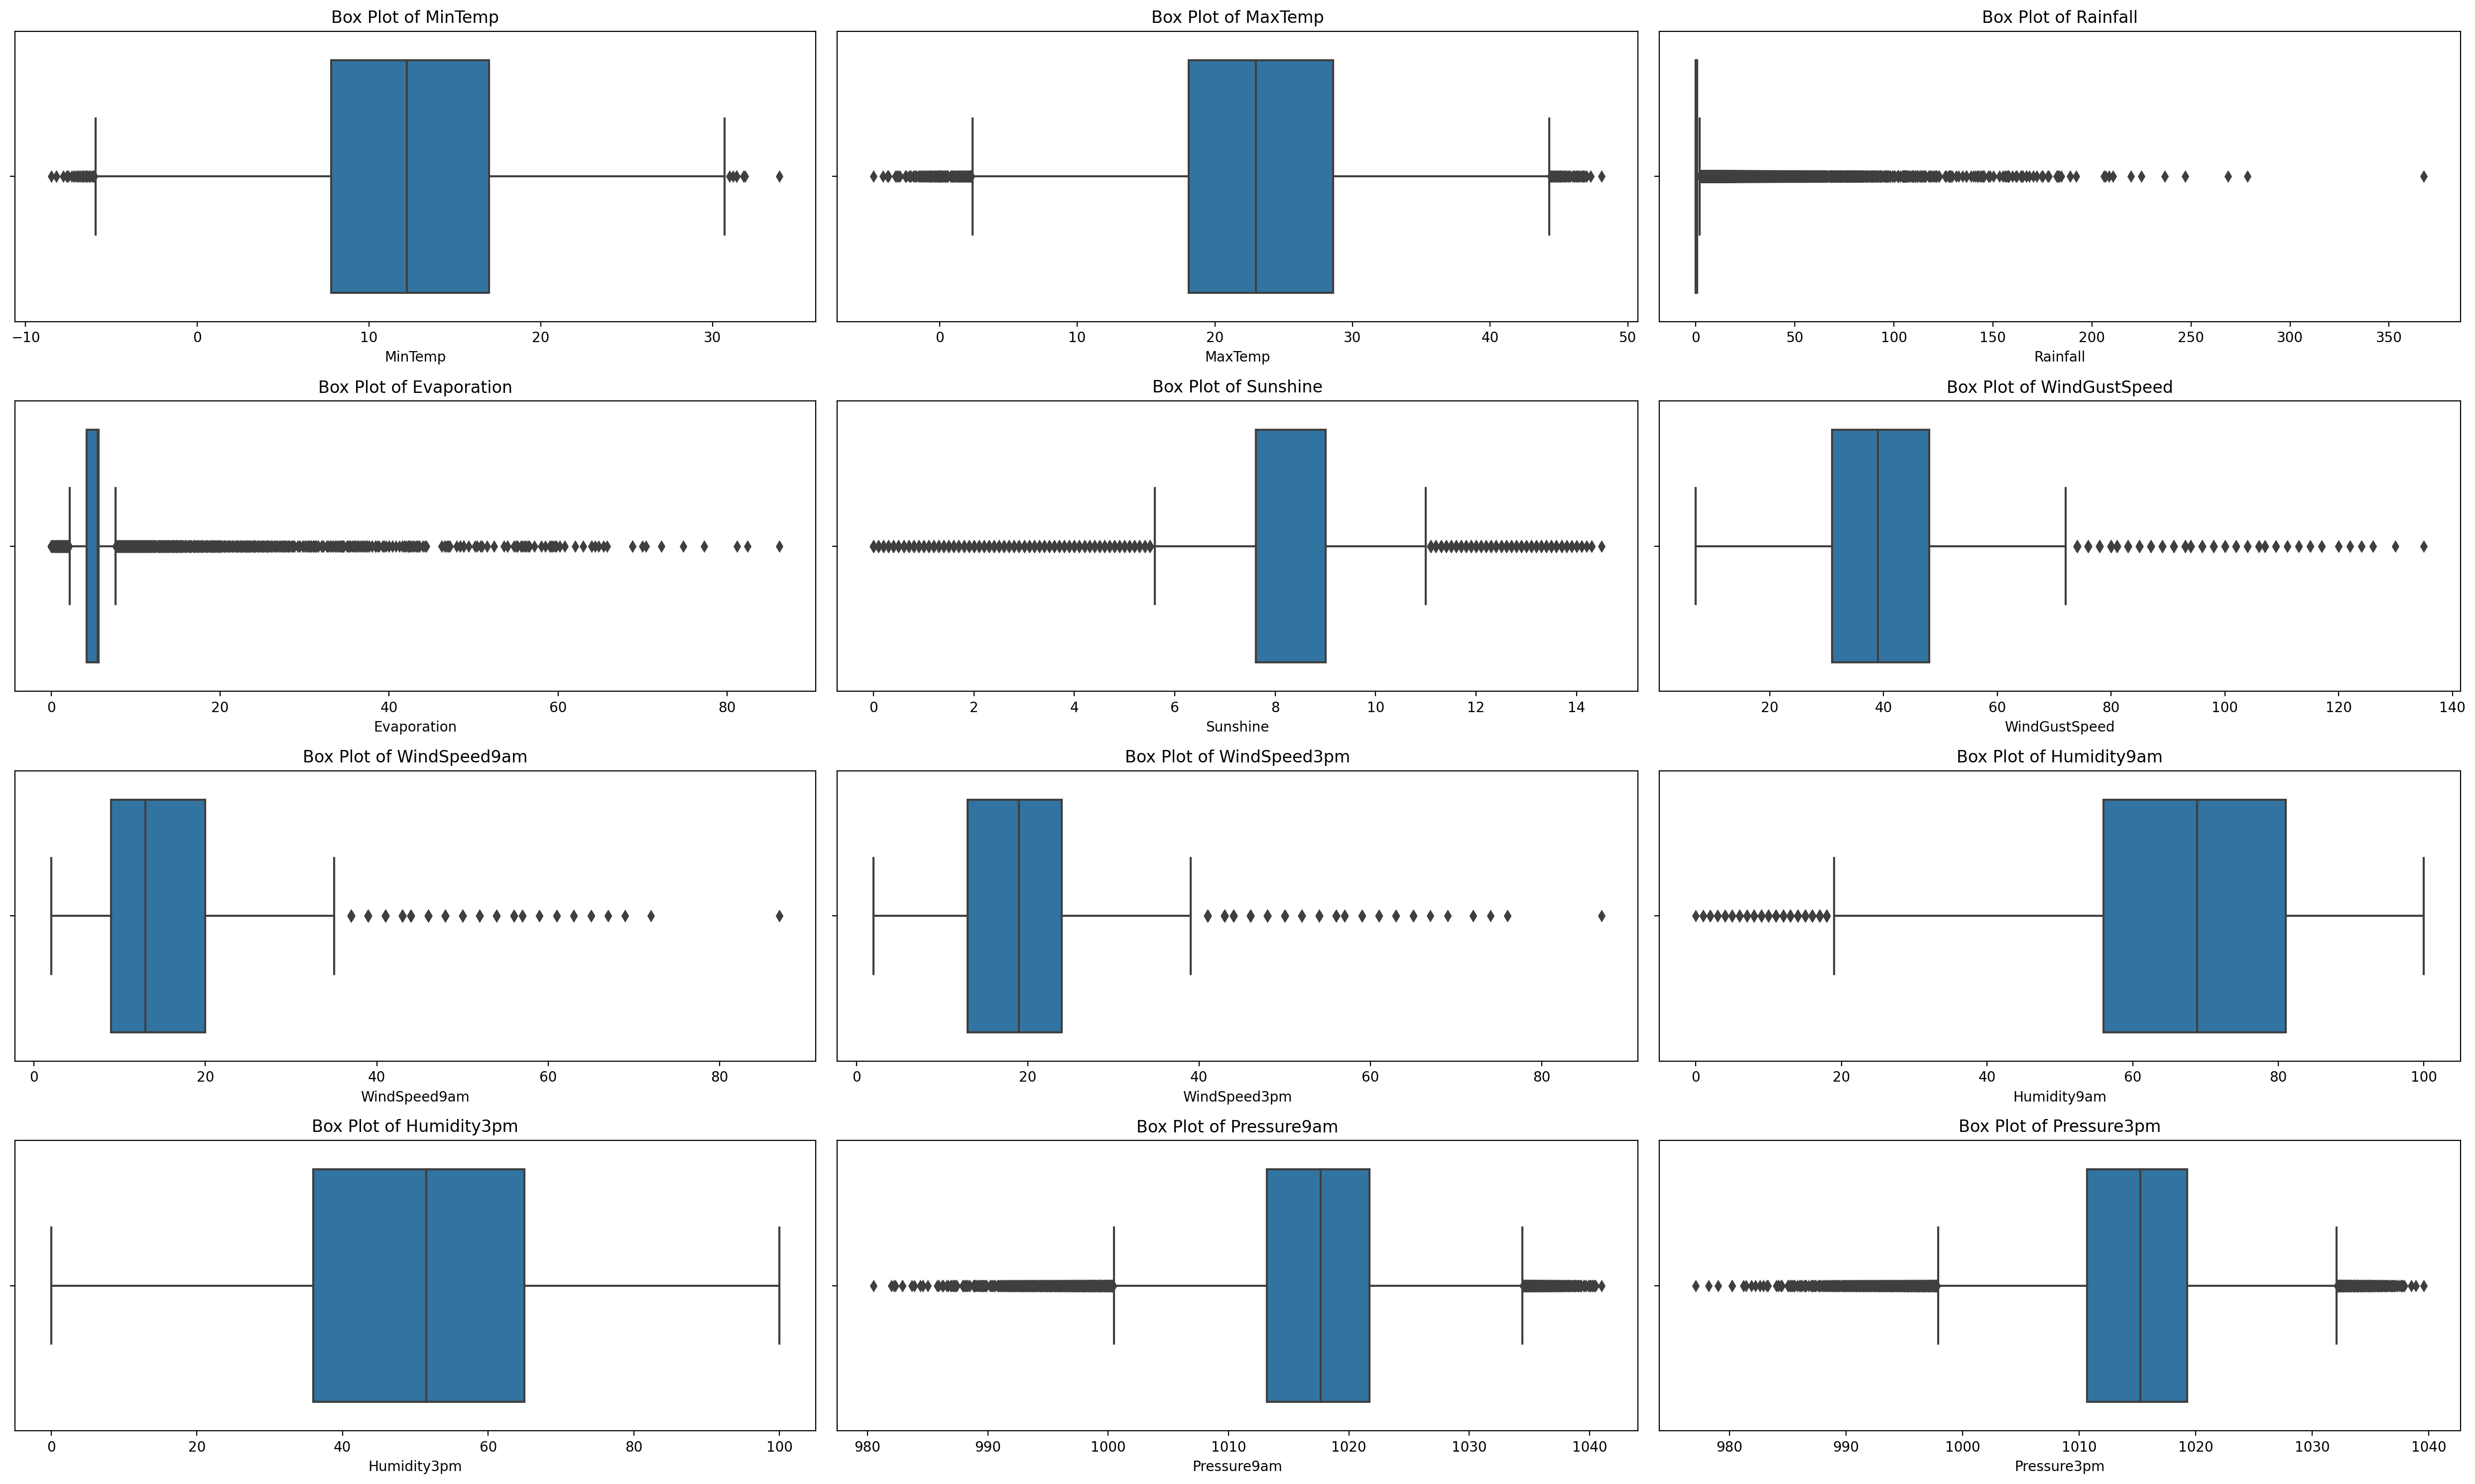

outliers  percentage
Sunshine          32372   26.167650
Evaporation       29870   24.145178
Rainfall          22267   17.999353
Cloud3pm           4374    3.535688
WindGustSpeed      2921    2.361167
WindSpeed3pm       2248    1.817153
Pressure9am        2068    1.671651
WindSpeed9am       2051    1.657910
Pressure3pm        1758    1.421065
Humidity9am        1580    1.277181
Temp3pm             549    0.443780
MaxTemp             315    0.254628
Temp9am             204    0.164902
MinTemp              56    0.045267
Humidity3pm           0    0.000000
Cloud9am              0    0.000000

In [14]:
# Function Definition: create_boxplot
def create_boxplot(num1,num2,data,x_axis):
    nrows,ncols = num1,num2 # Set Subplot Dimensions

    # Create subplots
    fig,ax=plt.subplots(nrows,ncols,figsize=(25,15),dpi=200)

    n = 0 # Loop over subplots
    for i in range(nrows):
        for j in range(ncols):
            sns.boxplot(data=data,x=x_axis[n],ax=ax[i,j]) # Create Box Plot
            ax[i,j].set_title(f"Box Plot of {x_axis[n]}")
            n += 1

    plt.tight_layout()
    plt.show()

def find_outlier(data):
    # Calculate Quartiles and IQR
    Q1 = np.quantile(data,0.25)
    Q3 = np.quantile(data,0.75)
    
    # Calculate minimum and maximum IQR values
    IQR = Q3 - Q1
    min_IQR = Q1 - (1.5 * IQR)
    max_IQR = Q3 + (1.5 * IQR)
    
    # Find outliers
    outlier = []
    for i in data:
        if (i < min_IQR) or (i > max_IQR):
            outlier.append(i)
    return outlier

# Create Box Plots and analyze outliers
create_boxplot(4,3,df,num_cols)

# Create dataframe for outliers analysis
pd.DataFrame({
    "outliers":[len(j) for j in [find_outlier(df[i]) for i in num_cols]],
    "percentage":np.array([len(j) for j in [find_outlier(df[i]) for i in num_cols]]) / len(df) * 100
}).set_index(num_cols).sort_values("outliers",ascending=False)

In [15]:
Q1 = df[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']].quantile(0.25)
Q3 = df[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']].quantile(0.75)

# Calculate minimum and maximum IQR values
IQR = Q3 - Q1
min_IQR = Q1 - (1.5 * IQR)
max_IQR = Q3 + (1.5 * IQR)

print('Maximum Value for each variables: ', max_IQR)
print('Minimum Value for each variables: ', min_IQR)


more_than = (df > max_IQR)
lower_than = (df < min_IQR)

# Clear outlier
df = df.mask(more_than, max_IQR, axis=1)
df = df.mask(lower_than, min_IQR, axis=1)

Maximum Value for each variables:  Rainfall          2.0
Evaporation       7.7
WindGustSpeed    73.5
WindSpeed9am     36.5
WindSpeed3pm     40.5
dtype: float64
Minimum Value for each variables:  Rainfall        -1.2
Evaporation      2.1
WindGustSpeed    5.5
WindSpeed9am    -7.5
WindSpeed3pm    -3.5
dtype: float64


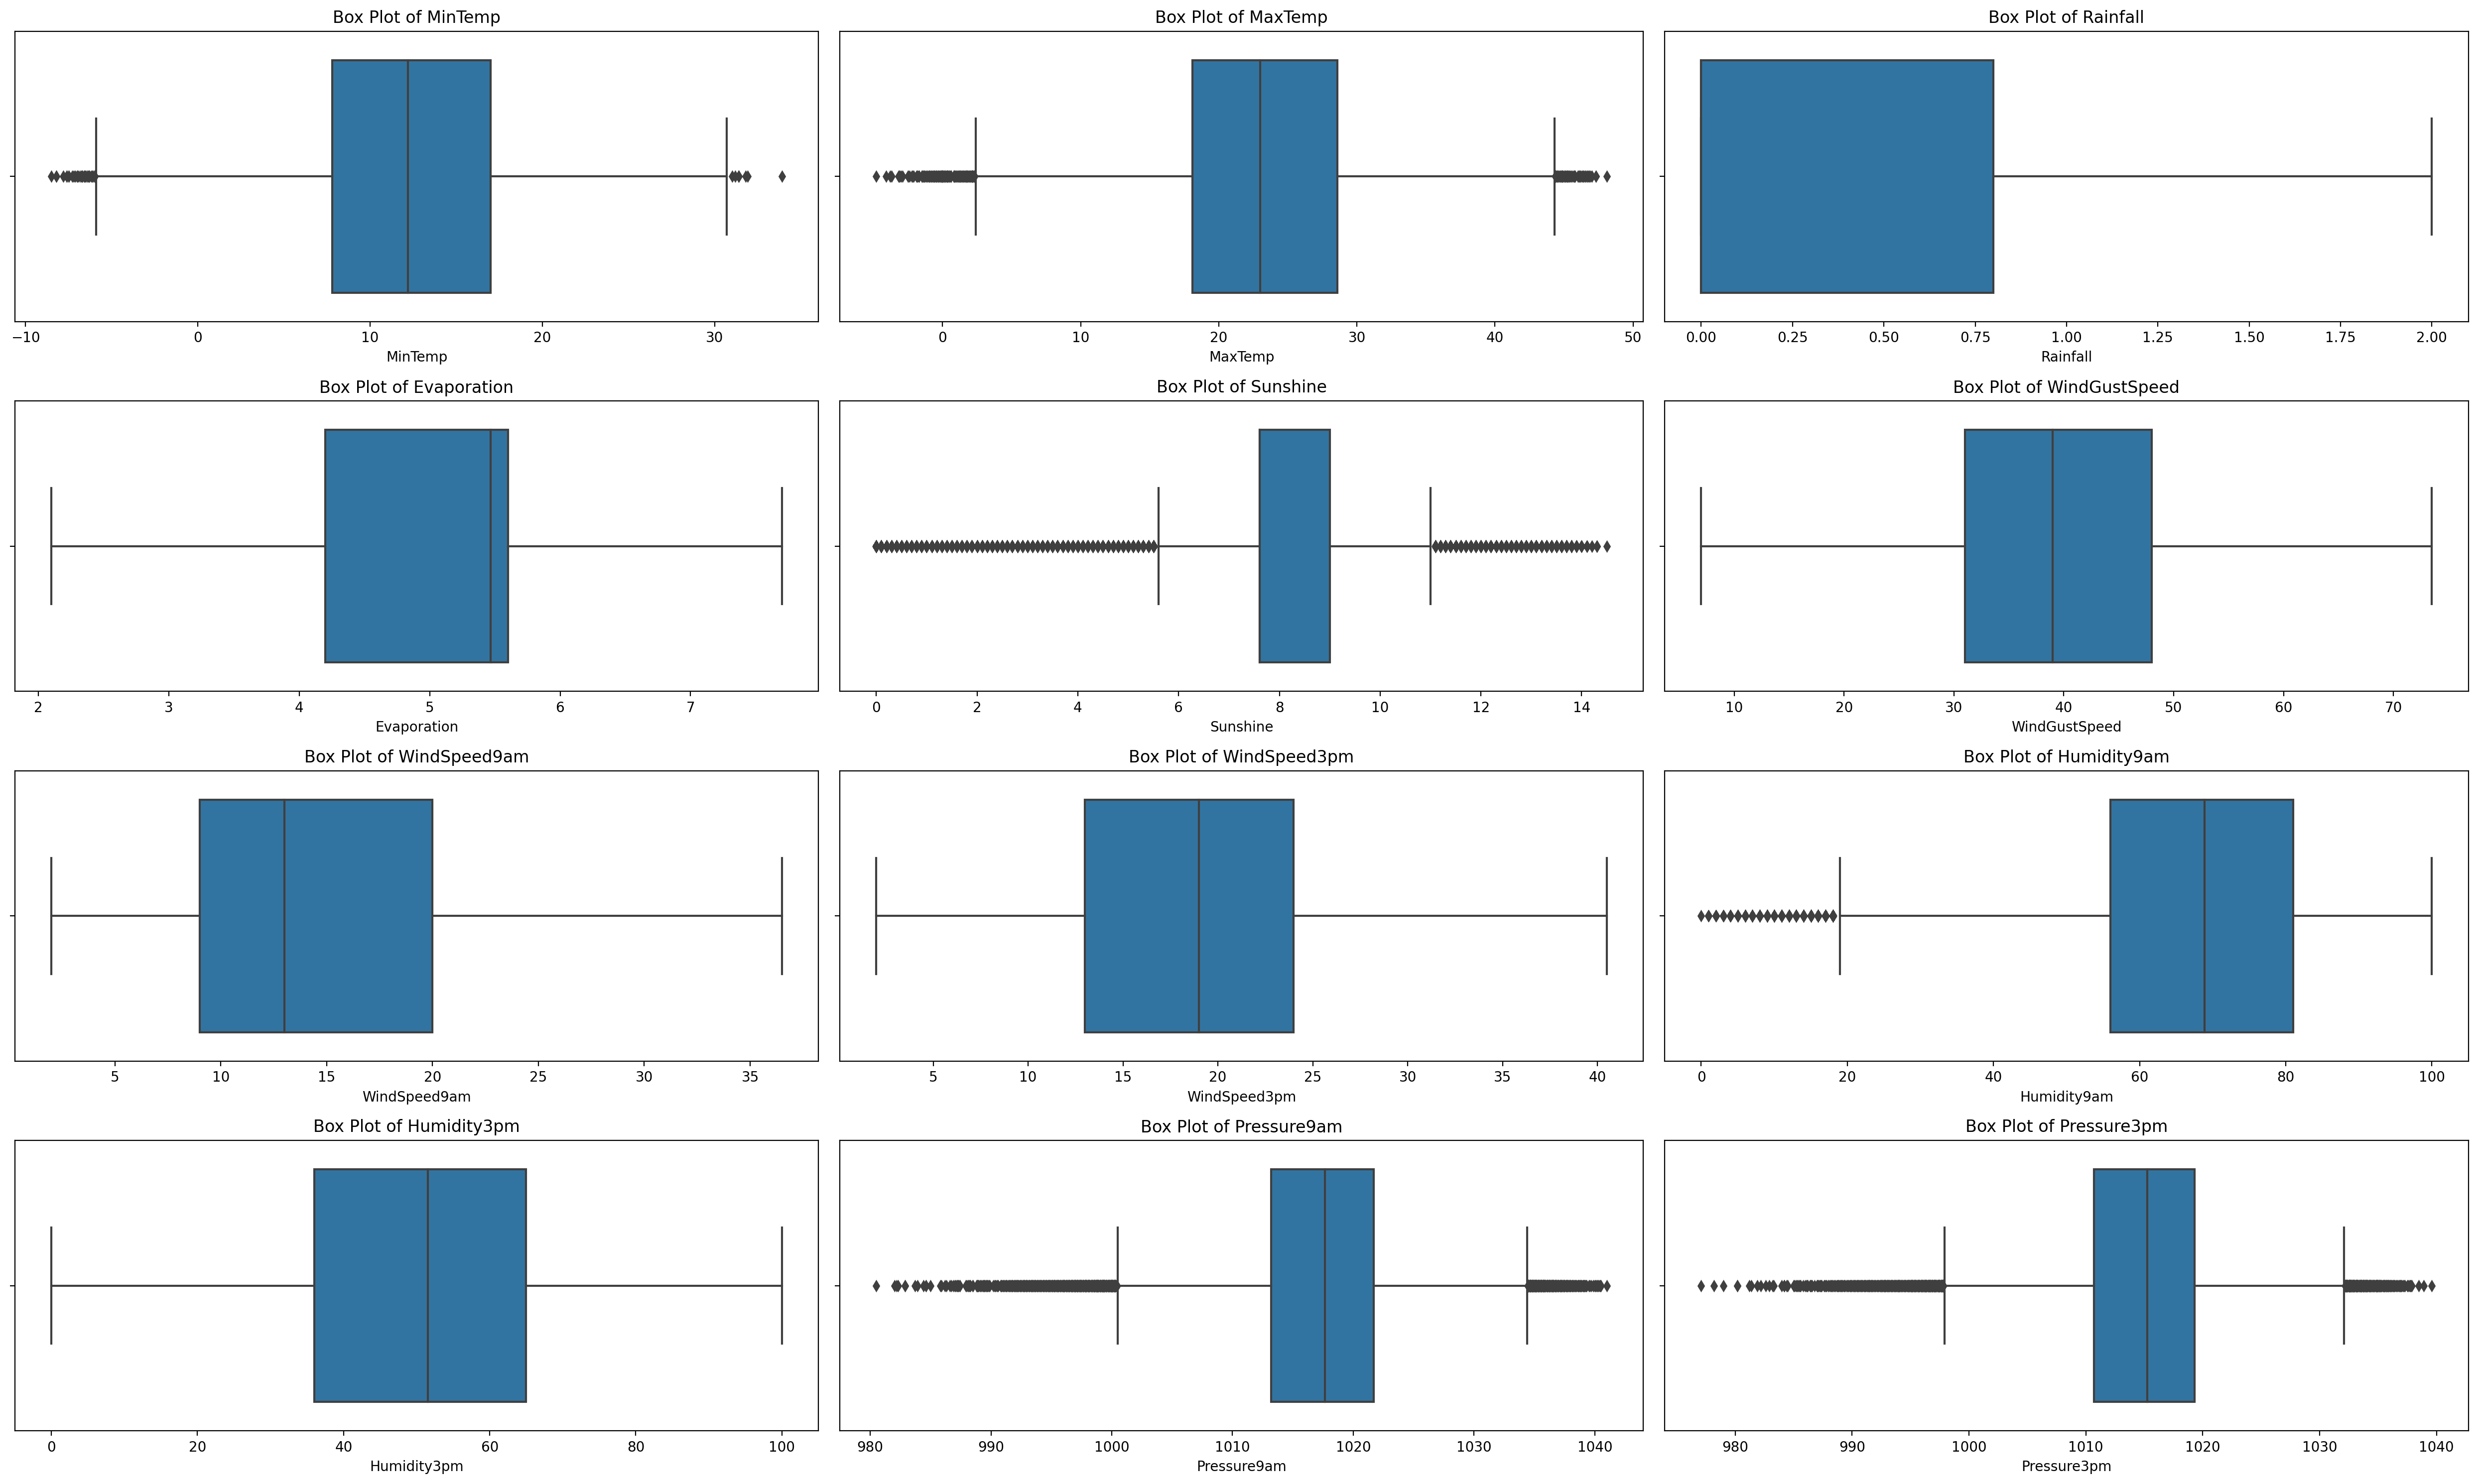

outliers  percentage
Sunshine          32372   26.167650
Cloud3pm           4374    3.535688
Pressure9am        2068    1.671651
Pressure3pm        1758    1.421065
Humidity9am        1580    1.277181
Temp3pm             549    0.443780
MaxTemp             315    0.254628
Temp9am             204    0.164902
MinTemp              56    0.045267
Rainfall              0    0.000000
Evaporation           0    0.000000
WindGustSpeed         0    0.000000
WindSpeed9am          0    0.000000
WindSpeed3pm          0    0.000000
Humidity3pm           0    0.000000
Cloud9am              0    0.000000

In [16]:
# Create Box Plots and analyze outliers
create_boxplot(4,3,df,num_cols)

# Create dataframe for outliers analysis
pd.DataFrame({
    "outliers":[len(j) for j in [find_outlier(df[i]) for i in num_cols]],
    "percentage":np.array([len(j) for j in [find_outlier(df[i]) for i in num_cols]]) / len(df) * 100
}).set_index(num_cols).sort_values("outliers",ascending=False)

In [17]:
print(f"Number of Rows\t\t: {df.shape[0]}")
print(f"Number of Columns\t: {df.shape[1]}")

Number of Rows		: 123710
Number of Columns	: 22


In [18]:
# Viewing statistical data
df.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  123710.000000  123710.000000  123710.000000  123710.000000   
mean       12.413917      23.474808       0.486650       5.165545   
std         6.366792       7.205898       0.793145       1.685944   
min        -8.500000      -4.800000       0.000000       2.100000   
25%         7.800000      18.100000       0.000000       4.200000   
50%        12.200000      23.000000       0.000000       5.468232   
75%        17.000000      28.600000       0.800000       5.600000   
max        33.900000      48.100000       2.000000       7.700000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  123710.000000  123710.000000  123710.000000  123710.000000   
mean        7.669315      40.482237      14.915330      19.085991   
std         2.782271      12.746265       7.985716       8.292947   
min         0.000000       7.000000       2.000000       2.000000   
25%         7.611178      31.000000       9.000000      13.000000   
50%         7.611178      39.000000      13.000000      19.000000   
75%         9.000000      48.000000      20.000000      24.000000   
max        14.500000      73.500000      36.500000      40.500000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  123710.000000  123710.000000  123710.000000  123710.000000   
mean       67.664315      50.856904    1017.416706    1015.029505   
std        18.975503      20.839568       6.765690       6.703817   
min         0.000000       0.000000     980.500000     977.100000   
25%        56.000000      36.000000    1013.200000    1010.700000   
50%        68.880831      51.539116    1017.649940    1015.255889   
75%        81.000000      65.000000    1021.700000    1019.300000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  
count  123710.000000  123710.000000  123710.000000  123710.000000  
mean        4.422374       4.498630      17.268860      21.895705  
std         2.280965       2.124822       6.477882       7.005865  
min         0.000000       0.000000      -7.200000      -5.400000  
25%         3.000000       4.000000      12.500000      16.800000  
50%         4.447461       4.509930      16.990631      21.500000  
75%         6.000000       6.000000      21.900000      26.700000  
max         9.000000       9.000000      40.200000      46.700000

In [19]:
# Check the number of missing values in the dataset
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [20]:
# Check duplicated data
df.duplicated().sum()

0

# **Data Exploration**
Data Exploration is the process of analyzing and visualizing a dataset to gain insights and understand its characteristics.
<hr>

In [21]:
# Get a list of columns in the dataset
dataset_columns = df.columns

# Loop through each column
for column in dataset_columns:
    # Display unique values in the column, sorted
    unique_values = df[column].sort_values().unique()
    print(f"Column: {column}")
    print(unique_values)
    print("\n")

Column: Location
['Adelaide' 'Albury' 'AliceSprings' 'BadgerysCreek' 'Ballarat' 'Bendigo'
 'Brisbane' 'Cairns' 'Canberra' 'Cobar' 'CoffsHarbour' 'Dartmoor' 'Darwin'
 'GoldCoast' 'Hobart' 'Katherine' 'Launceston' 'Melbourne'
 'MelbourneAirport' 'Mildura' 'Moree' 'MountGambier' 'MountGinini' 'Nhil'
 'NorahHead' 'NorfolkIsland' 'Nuriootpa' 'PearceRAAF' 'Penrith' 'Perth'
 'PerthAirport' 'Portland' 'Richmond' 'Sale' 'SalmonGums' 'Sydney'
 'SydneyAirport' 'Townsville' 'Tuggeranong' 'Uluru' 'WaggaWagga' 'Walpole'
 'Watsonia' 'Williamtown' 'Witchcliffe' 'Wollongong' 'Woomera']


Column: MinTemp
[-8.5        -8.2        -7.8        -7.6        -7.5        -7.3
 -7.2        -7.1        -7.         -6.9        -6.8        -6.7
 -6.6        -6.5        -6.4        -6.3        -6.2        -6.1
 -6.         -5.9        -5.8        -5.7        -5.6        -5.5
 -5.4        -5.3        -5.2        -5.1        -5.         -4.9
 -4.8        -4.7        -4.6        -4.5        -4.4        -4.3
 -4.2     

Column: WindGustDir
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


Column: WindGustSpeed
[ 7.   9.  11.  13.  15.  17.  19.  20.  22.  24.  26.  28.  30.  31.
 33.  35.  37.  39.  41.  43.  44.  46.  48.  50.  52.  54.  56.  57.
 59.  61.  63.  65.  67.  69.  70.  72.  73.5]


Column: WindDir9am
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


Column: WindDir3pm
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


Column: WindSpeed9am
[ 2.   4.   6.   7.   9.  11.  13.  15.  17.  19.  20.  22.  24.  26.
 28.  30.  31.  33.  35.  36.5]


Column: WindSpeed3pm
[ 2.   4.   6.   7.   9.  11.  13.  15.  17.  19.  20.  22.  24.  26.
 28.  30.  31.  33.  35.  37.  39.  40.5]


Column: Humidity9am
[  0.           1.           2.           3.           4.
   5.           6.           7.           8.           9.
  10.          11.          12.          13.          14.
  15.     

Column: Temp3pm
[-5.4        -5.1        -4.4        -4.2        -4.1        -4.
 -3.9        -3.8        -3.7        -3.5        -3.4        -3.2
 -3.1        -3.         -2.9        -2.8        -2.7        -2.6
 -2.5        -2.4        -2.3        -2.2        -2.1        -2.
 -1.9        -1.8        -1.7        -1.6        -1.5        -1.4
 -1.3        -1.2        -1.1        -1.         -0.9        -0.8
 -0.7        -0.6        -0.5        -0.4        -0.3        -0.2
 -0.1         0.          0.1         0.2         0.3         0.4
  0.5         0.6         0.7         0.8         0.9         1.
  1.1         1.2         1.3         1.4         1.5         1.6
  1.7         1.8         1.9         2.          2.1         2.2
  2.3         2.4         2.5         2.6         2.7         2.8
  2.9         3.          3.1         3.2         3.3         3.4
  3.5         3.6         3.7         3.8         3.9         4.
  4.1         4.2         4.3         4.4         4.5         4.

**What is the distribution of rain possibilities for the next day?**

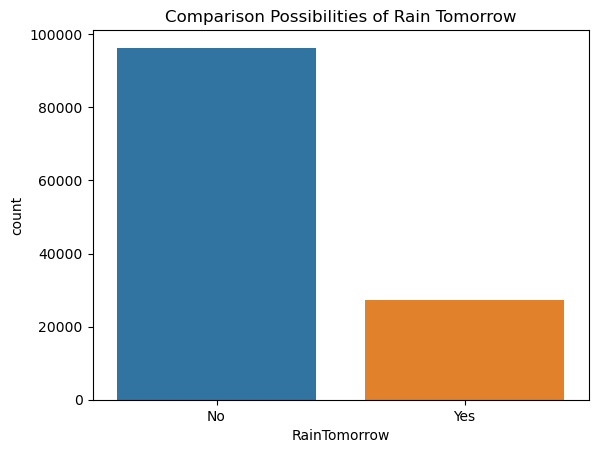

In [22]:
# Create a count plot
sns.countplot(x='RainTomorrow', data=df)

plt.title('Comparison Possibilities of Rain Tomorrow')
plt.show()

**Conclusion:**

Based on the above countplot, it can be seen that 'No' has a higher value. Therefore, it can be concluded that `there is a likelihood that some regions in Australia will not have rain tomorrow`.

**Which area is most likely to experience rain tomorrow in Australia?**

In [23]:
# # Assume 'RainTomorrow' is a column containing 'Yes = 1' and 'No = 0'
df['RainTomorrow_numeric'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})

# Create a new DataFrame by grouping based on 'Location' and summing 'RainTomorrow_numeric'
tomorrow_rain = pd.DataFrame(df.groupby('Location')['RainTomorrow_numeric'].sum().sort_values(ascending=True))

# Reset the index to make 'Location' a regular column
tomorrow_rain = tomorrow_rain.reset_index()

print(tomorrow_rain)

            Location  RainTomorrow_numeric
0              Uluru                   110
1            Woomera                   193
2       AliceSprings                   228
3               Nhil                   236
4          Katherine                   238
5            Mildura                   315
6              Moree                   336
7              Cobar                   377
8         PearceRAAF                   401
9           Richmond                   428
10       Tuggeranong                   431
11        SalmonGums                   461
12        Townsville                   491
13     BadgerysCreek                   494
14           Penrith                   494
15        WaggaWagga                   508
16          Canberra                   508
17       Williamtown                   515
18           Bendigo                   517
19         Melbourne                   522
20            Albury                   529
21         Nuriootpa                   554
22      Per

In [24]:
# Make plot
fig = px.bar(tomorrow_rain, x='RainTomorrow_numeric', y='Location', orientation='h',
             color='RainTomorrow_numeric',  # Warna berdasarkan jumlah 'Yes' (1) dan 'No' (0)
             title="Location in Australia that Most Likely to Rain Tomorrow",
             labels={'RainTomorrow_numeric': 'Value of yes in Rain Tomorrow', 'Location': 'Location'},  # Ubah judul sumbu x dan y
             width=1500,
             height=1000)  # Meningkatkan tinggi grafik

# Show graph
fig.show()

**Conclusion:**

Interactive horizontal bar plot above visually represents the locations in Australia with their corresponding likelihood of experiencing rain tomorrow. Based on the barplot and information above, it is known that the `Portland has a higher average prediction of rain occurrence tomorrow compared to other location in Australia`.

**The possibilities of rain tomorrow or not based on today's rain condition**

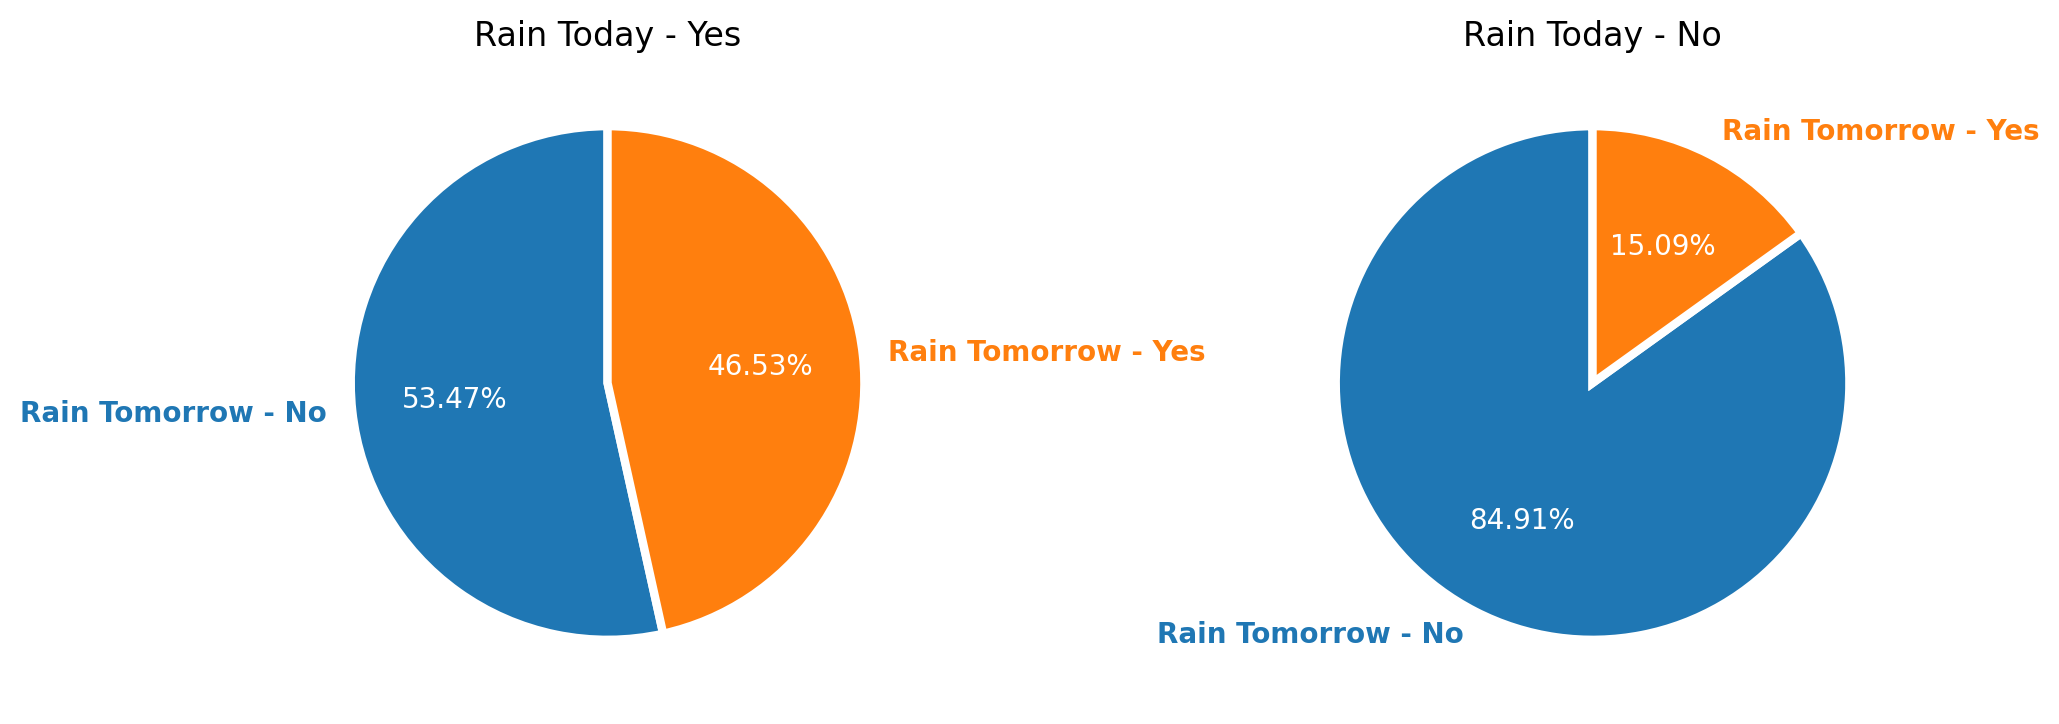

In [25]:
nrows,ncols = 1,2
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols)

for i,j in zip(range(ncols),["Yes","No"]):
    patches,texts,pcts = ax[i].pie(
        np.ravel(df.groupby(["RainToday","RainTomorrow"]).count()[["Location"]].loc[j].values),
        labels=["Rain Tomorrow - No","Rain Tomorrow - Yes"],
        startangle=90,
        autopct="%.2f%%",
        wedgeprops={"linewidth":3.0,"edgecolor":"white"},
    )
    for k,patch in enumerate(patches):
        texts[k].set_color(patch.get_facecolor())

    plt.setp(pcts,color="white")
    plt.setp(texts,fontweight=600)

    ax[i].set_title(f"Rain Today - {j}")
    
plt.tight_layout()
plt.show()

**Conclusion:**

Calculate the percentage of occurrence of rain on the next day based on whether if it rains today or not. Base on the pie chart above, it can be concluded that `if it rains today, there's a possibilities it doesn't rain on the next day with the percentage of 53,47%`.

# **Data Preprocessing**
Data preprocessing refers to the initial steps taken to clean, transform, and organize raw data before it can be effectively utilized for analysis or machine learning.
<hr>

In [26]:
# Show 5 column from the top 
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     5.468232  7.611178           W   
1   Albury      7.4     25.1       0.0     5.468232  7.611178         WNW   
2   Albury     12.9     25.7       0.0     5.468232  7.611178         WSW   
3   Albury      9.2     28.0       0.0     5.468232  7.611178          NE   
4   Albury     17.5     32.3       1.0     5.468232  7.611178           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity3pm  Pressure9am  \
0           44.0          W        WNW  ...         22.0       1007.7   
1           44.0        NNW        WSW  ...         25.0       1010.6   
2           46.0          W        WSW  ...         30.0       1007.6   
3           24.0         SE          E  ...         16.0       1017.6   
4           41.0        ENE         NW  ...         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1  8.000000   4.50993     16.9     21.8         No            No   
1       1007.8  4.447461   4.50993     17.2     24.3         No            No   
2       1008.7  4.447461   2.00000     21.0     23.2         No            No   
3       1012.8  4.447461   4.50993     18.1     26.5         No            No   
4       1006.0  7.000000   8.00000     17.8     29.7         No            No   

   RainTomorrow_numeric  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 23 columns]

In [27]:
# View dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Location              123710 non-null  object 
 1   MinTemp               123710 non-null  float64
 2   MaxTemp               123710 non-null  float64
 3   Rainfall              123710 non-null  float64
 4   Evaporation           123710 non-null  float64
 5   Sunshine              123710 non-null  float64
 6   WindGustDir           123710 non-null  object 
 7   WindGustSpeed         123710 non-null  float64
 8   WindDir9am            123710 non-null  object 
 9   WindDir3pm            123710 non-null  object 
 10  WindSpeed9am          123710 non-null  float64
 11  WindSpeed3pm          123710 non-null  float64
 12  Humidity9am           123710 non-null  float64
 13  Humidity3pm           123710 non-null  float64
 14  Pressure9am           123710 non-null  float64
 15  

## Check for Correlation

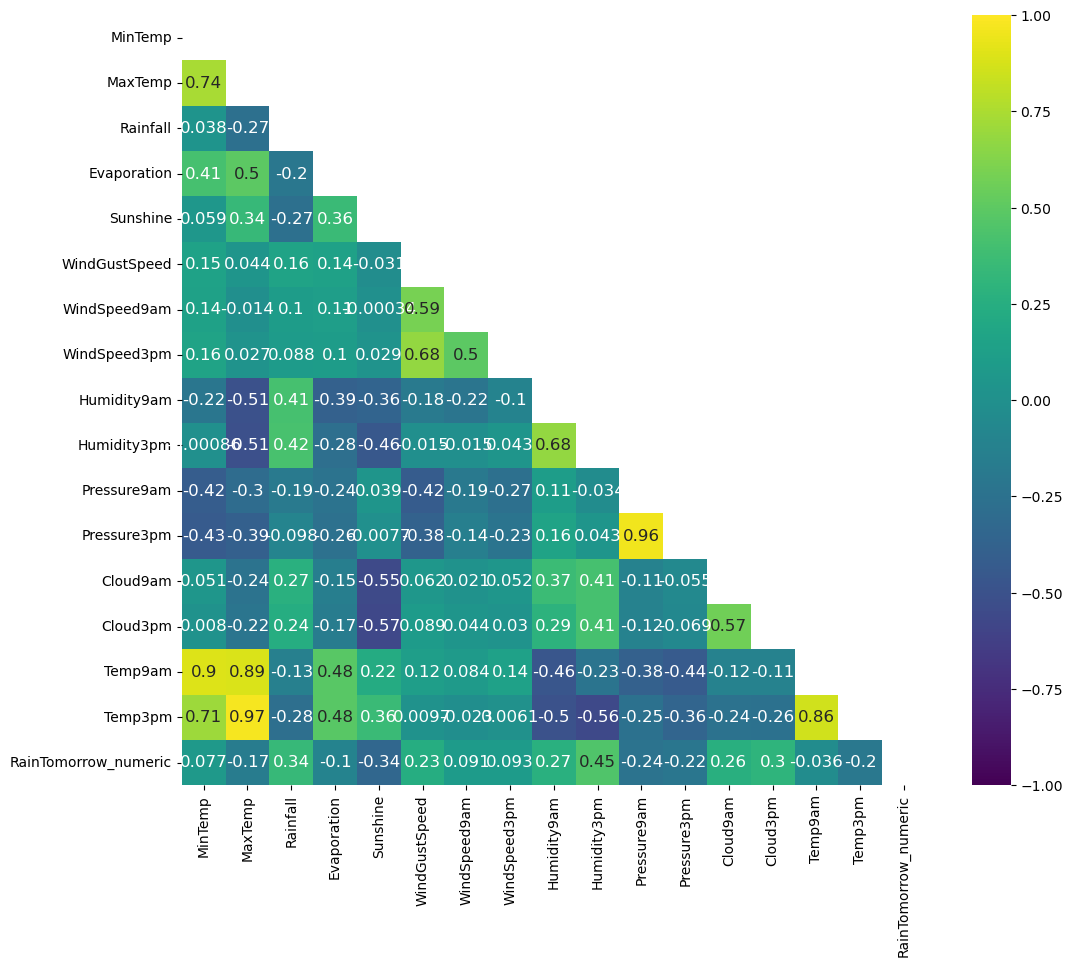

In [28]:
# Create a correlation matrix
correlation_mat = df.corr()

# Create a mask
mask = np.triu(np.ones_like(correlation_mat, dtype=bool))

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_mat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize': 12},
            mask=mask,
            cmap="viridis")
plt.show()

In this analysis, it was found that the columns `'MinTemp', 'MaxTemp', 'Temp9am', and 'Pressure9am' have very high correlation values` among them. High correlation between variables can lead to autocorrelation issues in statistical analysis, especially when using regression models. Autocorrelation can affect the stability and accuracy of the model, as these variables provide very similar information.

To avoid this issue, we decided to drop these columns based on the analysis needs and the goals of the model to be built. By removing these columns, we can improve the interpretability of the model, reduce complexity, and optimize the model's performance in generating accurate predictions.

In [29]:
# Delete or drop data
df.drop(['MinTemp','MaxTemp','Temp9am','Pressure9am'], axis=1, inplace=True)

In [30]:
# Resets the index of the dataframe
df.reset_index(drop=True, inplace=True)

In [31]:
# View dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Location              123710 non-null  object 
 1   Rainfall              123710 non-null  float64
 2   Evaporation           123710 non-null  float64
 3   Sunshine              123710 non-null  float64
 4   WindGustDir           123710 non-null  object 
 5   WindGustSpeed         123710 non-null  float64
 6   WindDir9am            123710 non-null  object 
 7   WindDir3pm            123710 non-null  object 
 8   WindSpeed9am          123710 non-null  float64
 9   WindSpeed3pm          123710 non-null  float64
 10  Humidity9am           123710 non-null  float64
 11  Humidity3pm           123710 non-null  float64
 12  Pressure3pm           123710 non-null  float64
 13  Cloud9am              123710 non-null  float64
 14  Cloud3pm              123710 non-null  float64
 15  

## Feature Selection

In [32]:
X = pd.get_dummies(df.drop(["RainTomorrow","RainTomorrow_numeric"],axis=1),drop_first=True)
    # Create dummy/indicator variables for categorical columns in the DataFrame
    # Drop the specified columns ("RainTomorrow" and "RainTomorrow_numeric") 
    # Drop the first category of each categorical variable to avoid multicollinearity in the features
y = df["RainTomorrow"]
    # Select the column "RainTomorrow" from the dataframe

Split the dataframe into training and testing sets with a ratio of 70:30.

In [33]:
# Split dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(f"Training dataset\t: {len(X_train)} ({round(len(X_train) / len(X) * 100)}%)")
print(f"Testing dataset\t\t: {len(X_test)} ({round(len(X_test) / len(X) * 100)}%)")

Training dataset	: 86597 (70%)
Testing dataset		: 37113 (30%)


 * **X_train**: Features for training set.
 * **X_test:** Features for testing set.
 * **y_train:** Target variable for the training set.
 * **y_test:** Target variable for the testing set.
 * **train_test_split:** Splits the dataset into training and testing sets. test_size=0.3 specifies that 30% of the data should be used for testing. random_state=42 ensures reproducibility.
 
 Due to all featues have different scales, we'll standardize them with StandardScaler(), the scaler is fitted to the training data to learn the mean and standard deviation, and then it is used to standardize both the training and testing sets. 

In [34]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# **Model Definition**
In this phase, we define the model or algorithm that will be used for our predictive analysis. The choice of the model depends on the nature of the problem and the data we have. We'll use linear regression in this case.
<hr>

In [35]:
log_model = LogisticRegression(class_weight="balanced",random_state=42,max_iter=5000)
log_model.fit(scaled_X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

In [36]:
log_pred = log_model.predict(scaled_X_test)
log_prob = log_model.predict_proba(scaled_X_test)

In [37]:
pd.DataFrame({
    "probability_yes_raintomorrow":log_prob[:,1] * 100,
    "probability_no_raintomorrow":log_prob[:,0] * 100,
    "prediction_raintomorrow":log_pred,
    "actual_raintomorrow":y_test,
    "accuracy":[True if i == j else False for i,j in zip(y_test,log_pred)]
}).reset_index(drop=True)

probability_yes_raintomorrow  probability_no_raintomorrow  \
0                         66.681840                    33.318160   
1                         43.272519                    56.727481   
2                         86.246752                    13.753248   
3                         49.817393                    50.182607   
4                          5.014144                    94.985856   
...                             ...                          ...   
37108                     68.684263                    31.315737   
37109                     92.336003                     7.663997   
37110                     10.752491                    89.247509   
37111                     31.598650                    68.401350   
37112                     30.567428                    69.432572   

      prediction_raintomorrow actual_raintomorrow  accuracy  
0                         Yes                  No     False  
1                          No                  No      True  
2                         Yes                 Yes      True  
3                          No                  No      True  
4                          No                  No      True  
...                       ...                 ...       ...  
37108                     Yes                  No     False  
37109                     Yes                 Yes      True  
37110                      No                  No      True  
37111                      No                  No      True  
37112                      No                 Yes     False  

[37113 rows x 5 columns]

In [38]:
svm_model = SVC(class_weight="balanced",random_state=42)
svm_model.fit(scaled_X_train,y_train)

SVC(class_weight='balanced', random_state=42)

In [39]:
svm_pred = svm_model.predict(scaled_X_test)

In [40]:
pd.DataFrame({
    "prediction_raintomorrow":svm_pred,
    "actual_raintomorrow":y_test,
    "accuracy":[True if i == j else False for i,j in zip(y_test,svm_pred)]
}).reset_index(drop=True)

prediction_raintomorrow actual_raintomorrow  accuracy
0                         Yes                  No     False
1                          No                  No      True
2                         Yes                 Yes      True
3                          No                  No      True
4                          No                  No      True
...                       ...                 ...       ...
37108                     Yes                  No     False
37109                     Yes                 Yes      True
37110                      No                  No      True
37111                      No                  No      True
37112                     Yes                 Yes      True

[37113 rows x 3 columns]

## Logistic Regression

Logistic Regression is a statistical method commonly used in machine learning for binary classification tasks, where the outcome variable has two categories. In the context of predictive modeling, such as weather forecasting, Logistic Regression is applied to predict the likelihood of a binary outcome, like whether it will rain tomorrow ('Yes' or 'No'). The algorithm models the relationship between input features (e.g., temperature, humidity) and the probability of a particular event using the logistic function. Despite its name, Logistic Regression is employed for classification, not regression, and provides a probability score for each instance. By setting a threshold, the model categorizes instances into the respective classes, making it a valuable tool for predicting binary outcomes based on relevant features.

## Reasons Why We Use Logistic Regression

In defining this model, we use the Logistic Regression model to predict whether it will rain tomorrow or not. Logistic Regression is chosen because we have a binary target variable, namely 'RainTomorrow,' which can have values of 'Yes' or 'No.' Additionally, we have performed data preprocessing steps, such as category encoding, splitting the dataset into training and testing data, and feature scaling using StandardScaler. All these steps aim to enhance the model's performance and assist in making more accurate predictions regarding tomorrow's weather. After the scaling process, we can train the model on the training data and test its performance on the testing data to measure how well the model can predict whether it will rain tomorrow or not.

# Model Training
Model training is a crucial step in machine learning where the model learns from the data. 
<hr>

In [41]:
# Function definition
def evaluation(y_test,y_pred):
    # Print classification report
    print(classification_report(y_test,y_pred))

    # Confusion matrix metrics
    true_yes = confusion_matrix(y_test,y_pred)[1,1]
    false_yes = confusion_matrix(y_test,y_pred)[1,0]
    true_no = confusion_matrix(y_test,y_pred)[0,0]
    false_no = confusion_matrix(y_test,y_pred)[0,1]

    print(f"True\x1B[3m Yes\x1B[0m\t: {true_yes}\t({round(true_yes / (true_yes + false_yes) * 100,2)}%)")
    print(f"False\x1B[3m Yes\x1B[0m\t: {false_yes}\t({round(false_yes / (true_yes + false_yes) * 100,2)}%)")
    print(f"True\x1B[3m No\x1B[0m\t\t: {true_no}\t({round(true_no / (true_no + false_no) * 100,2)}%)")
    print(f"False\x1B[3m No\x1B[0m\t: {false_no}\t({round(false_no / (true_no + false_no) * 100,2)}%)")

    # Plot confusion matrix
    plt.figure(dpi=100)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=plt.gca())
    plt.grid(False)
    plt.show()

              precision    recall  f1-score   support

          No       0.93      0.80      0.86     28857
         Yes       0.53      0.78      0.63      8256

    accuracy                           0.80     37113
   macro avg       0.73      0.79      0.75     37113
weighted avg       0.84      0.80      0.81     37113

True Yes	: 6448	(78.1%)
False Yes	: 1808	(21.9%)
True No		: 23189	(80.36%)
False No	: 5668	(19.64%)


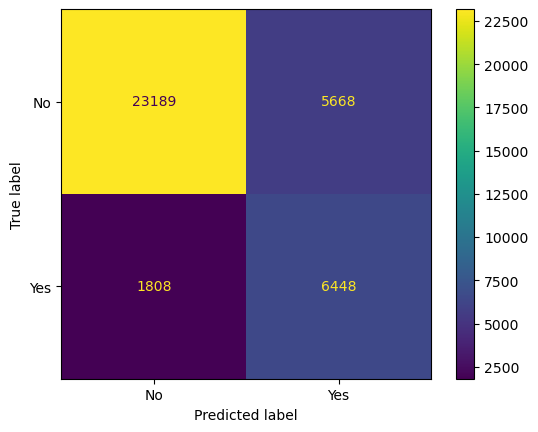

In [42]:
evaluation(y_test,log_pred)

The code evaluation(y_test, log_pred) calls the evaluation function with two arguments:

* y_test: This is the actual target values (ground truth) from the testing dataset.
* log_pred: This is the predicted target values obtained from a logistic regression model.

The evaluation function then prints a classification report and displays a confusion matrix along with various metrics based on the provided actual and predicted labels. 

              precision    recall  f1-score   support

          No       0.93      0.83      0.88     28857
         Yes       0.57      0.79      0.66      8256

    accuracy                           0.82     37113
   macro avg       0.75      0.81      0.77     37113
weighted avg       0.85      0.82      0.83     37113

True Yes	: 6508	(78.83%)
False Yes	: 1748	(21.17%)
True No		: 23907	(82.85%)
False No	: 4950	(17.15%)


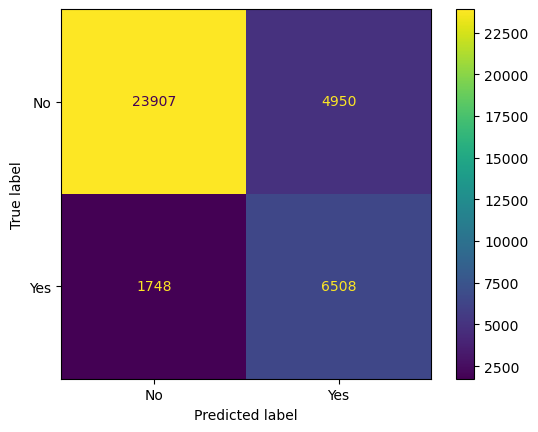

In [43]:
evaluation(y_test,svm_pred)

The code evaluation(y_test, svm_pred) calls the evaluation function with two arguments:

* y_test: This is the actual target values (ground truth) from the testing dataset.
* svm_pred: This is the predicted target values obtained from a support vector machine (SVM) model.

The evaluation function then prints a classification report and displays a confusion matrix along with various metrics based on the provided actual and predicted labels. 

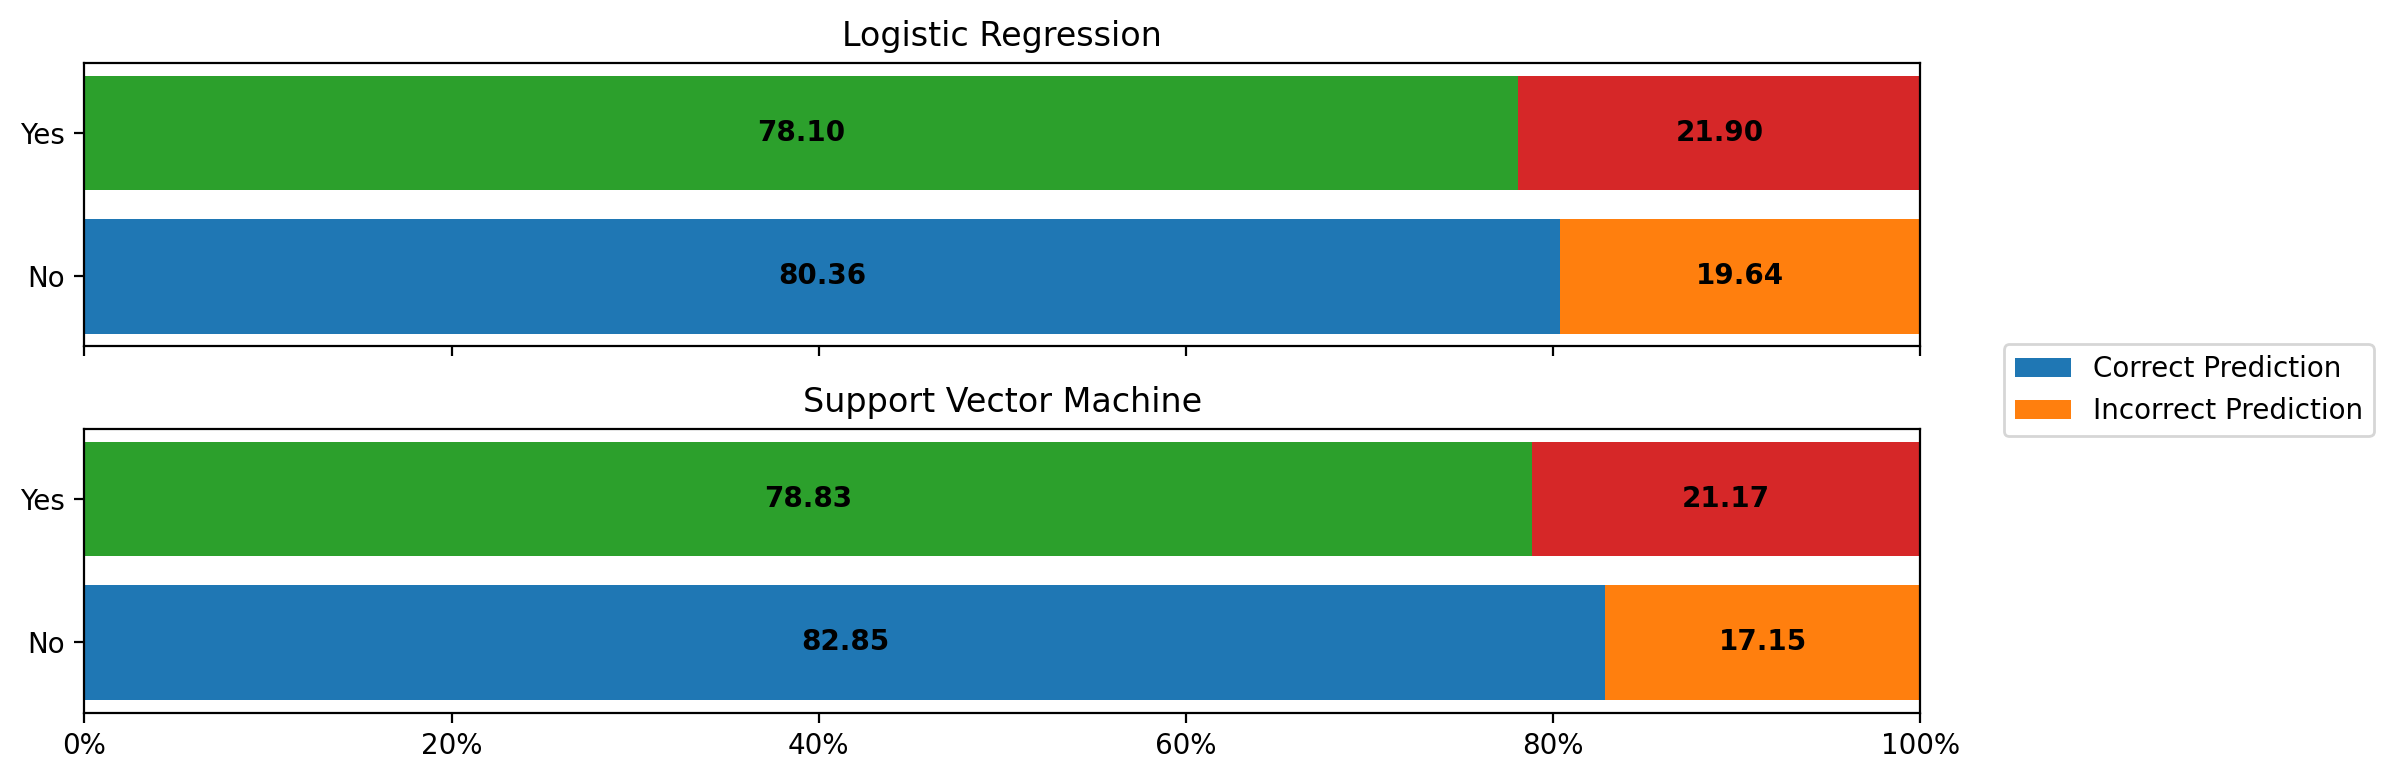

In [44]:
nrows, ncols = 2, 1
fig, ax = plt.subplots(figsize=(10, 4), dpi=200, nrows=nrows, ncols=ncols, sharex=True)

# Loop through models, predictions, and labels
for i, j, k in zip(range(nrows), [log_pred, svm_pred], ["Logistic Regression", "Support Vector Machine"]):
    true_yes = confusion_matrix(y_test, j)[1, 1]
    false_yes = confusion_matrix(y_test, j)[1, 0]
    true_no = confusion_matrix(y_test, j)[0, 0]
    false_no = confusion_matrix(y_test, j)[0, 1]

    # Plot bars for 'No' predictions
    ax[i].barh("No", true_no / (true_no + false_no) * 100, label="Correct Prediction")
    ax[i].barh("No", false_no / (true_no + false_no) * 100, left=true_no / (true_no + false_no) * 100, label="Incorrect Prediction")
    
    # Plot bars for 'Yes' predictions
    ax[i].barh("Yes", true_yes / (true_yes + false_yes) * 100)
    ax[i].barh("Yes", false_yes / (true_yes + false_yes) * 100, left=true_yes / (true_yes + false_yes) * 100)

    # Set title and adjust limits
    ax[i].set_title(k)
    ax[i].set_xlim(xmax=100)

    # Add labels to the bars
    for container in ax[i].containers:
        ax[i].bar_label(container, fmt="%.2f", label_type="center", fontweight="bold")

# Format x-axis ticks as percentages
ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x, _: f"{round(x)}%"))

# Create legend
handles, labels = ax[i].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1, 0.5), loc="center left")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Horizontal bar plot above (for Logistic Regression and Support Vector Machine models) to visualize the correctness of predictions for each class ('Yes' and 'No'). The bars are color-coded to represent correct and incorrect predictions.


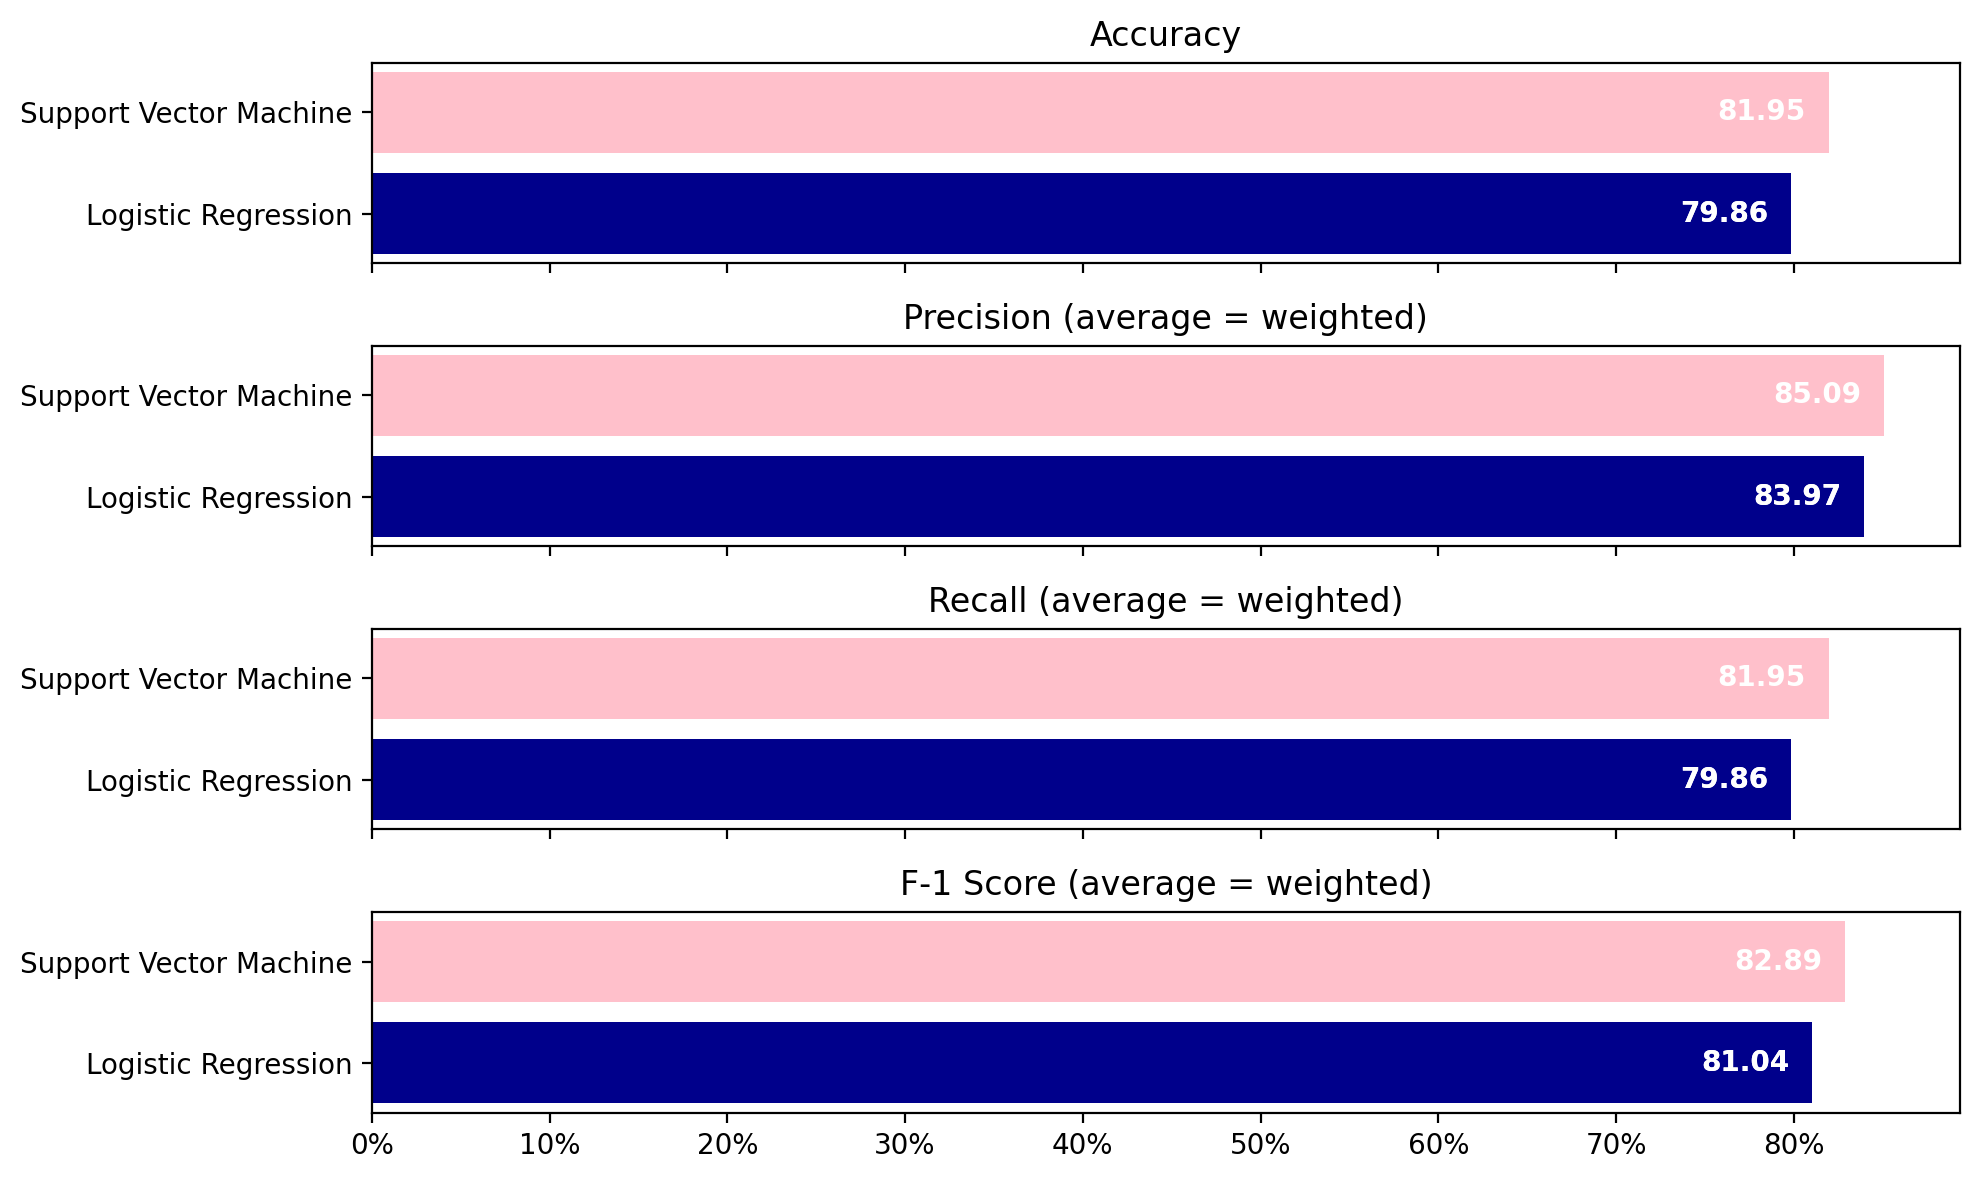

In [141]:
nrows,ncols = 4,1
fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i in range(nrows):
    for j,k,l in zip(
        [log_pred,svm_pred],
        ["Logistic Regression","Support Vector Machine"],
        ["darkblue","pink"]
    ):
        if i == 0:
            metric = accuracy_score(y_test,j) * 100
            title = "Accuracy"
        elif i == 1:
            metric = precision_score(y_test,j,average="weighted") * 100
            title = "Precision (average = weighted)"
        elif i == 2:
            metric = recall_score(y_test,j,average="weighted") * 100
            title = "Recall (average = weighted)"
        else:
            metric = f1_score(y_test,j,average="weighted") * 100
            title = "F-1 Score (average = weighted)"

        ax[i].barh(k,metric,color=l)
        ax[i].set_title(title)

        for container in ax[i].containers:
            ax[i].bar_label(container,fmt="%.2f",padding=-40,color="white",fontweight="bold")

ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f"{round(x)}%"))

plt.tight_layout()
plt.show()

Horizontal bar plot above (for Accuracy, Precision, Recall, and F-1 Score) compare the performance of Logistic Regression and Support Vector Machine models.

# **Model Evaluation and Inference**
* **Model evaluation** is a critical step in assessing how well a machine learning model performs on new, unseen data.
* **Model inference** refers to the application of a trained model to make predictions or classifications on new, unseen data. Once a model has been evaluated and deemed satisfactory, it can be deployed to make real-world predictions. 
<hr>

In [49]:
final_log_model = LogisticRegression(class_weight="balanced",max_iter=5000)
final_log_model.fit(X,y)

LogisticRegression(class_weight='balanced', max_iter=5000)

In [46]:
final_svm_model = SVC(class_weight="balanced")
final_svm_model.fit(X,y)

SVC(class_weight='balanced')

In [130]:
def predict(model,Rainfall, WindGustSpeed, Humidity9am, Humidity3pm, Pressure3pm, Temp3pm, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday):
    inputs = pd.DataFrame(columns=X.columns)
    location_code = [0 for i in inputs.columns[pd.Series(inputs.columns).str.startswith("Location")]]
    if Location != "Adelaide":
        n = 0
        for i in inputs.columns[pd.Series(inputs.columns).str.startswith("Location")]:
            if location in i:
                location_code[n] = 1
                break
            n += 1 

    windgustdir_code = [0 for i in inputs.columns[pd.Series(inputs.columns).str.startswith("WindGustDir")]]
    if WindGustDir != "E":
        n = 0
        for i in inputs.columns[pd.Series(inputs.columns).str.startswith("WindGustDir")]:
            if WindGustDir in i:
                windgustdir_code[n] = 1
                break
            n += 1 

    winddir9am_code = [0 for i in inputs.columns[pd.Series(inputs.columns).str.startswith("WindDir9am")]]
    if WindDir9am != "E":
        n = 0
        for i in inputs.columns[pd.Series(inputs.columns).str.startswith("WindDir9am")]:
            if WindDir9am in i:
                winddir9am_code[n] = 1
                break
            n += 1 

    winddir3pm_code = [0 for i in inputs.columns[pd.Series(inputs.columns).str.startswith("WindDir3pm")]]
    if WindDir3pm != "E":
        n = 0
        for i in inputs.columns[pd.Series(inputs.columns).str.startswith("WindDir3pm")]:
            if WindDir3pm in i:
                winddir3pm_code[n] = 1
                break
            n += 1 

    if RainToday == "Yes":
        raintoday_code = [1]
    elif RainToday == "No":
        raintoday_code = [0]

   # Construct the inputs DataFrame
    inputs_data = [Rainfall, WindGustSpeed, Humidity9am, Humidity3pm, Pressure3pm, Temp3pm] + location_code + windgustdir_code + winddir9am_code + winddir3pm_code + raintoday_code
    inputs = pd.DataFrame(data=[inputs_data], columns=X.columns)

    pred = model.predict(inputs)[0]

    if pred == 1:
        return f"It will be raining tomorrow"
    elif pred == 0:
        return f"It won't be raining tomorrow"

**Model:** Support Vector Machine (SVM)


**Feature Values:**
- Rainfall: 5 mm
- WindGustSpeed: 30 km/h
- Humidity9am: 60%
- Humidity3pm: 50%
- Pressure3pm: 1015 hPa
- Temp3pm: 25°C
- Location: Adelaide
- WindGustDir: N
- WindDir9am: NE
- WindDir3pm: NW
- RainToday: No

In [139]:
for i,j in zip([final_log_model,final_svm_model],["Logistic Regression","Support Vector Machine"]):
    print(f'{j}\t: {predict(i, 5, 30, 60, 50, 1015, 25, "Adelaide", "N", "NE", "NW", "No")}')

Logistic Regression	: It won't be raining tomorrow
Support Vector Machine	: It won't be raining tomorrow


# **Conclusion**
<hr>

Based on the analysis above, it can be seen that both logistic regression and SVM models handled the class imbalance problem well, that can be proven by the high percentages of correct predictions. Also, both models had high scores of ±80% on multiple metrics such as accuracy, precision, recall, and F-1 score. Since the SVM model performed slightly better than the logistic regression model, it can be concluded that the SVM model is the best model to predict rain in Australia and can be used for future use.

1. **Data Preprocessing:**
    * The dataset, "Weather AUS," was utilized to predict whether it would rain tomorrow in various locations across Australia.
    * Initial preprocessing involved handling missing values, encoding categorical variables, and dropping unnecessary columns.
    
    
2. **Exploratory Data Analysis (EDA):**
    * Exploratory data analysis revealed insights into the distribution of rainfall.
    * Box plots were employed to identify potential outliers in the numerical features.
    
    
3. **Model Training and Evaluation:**
    * Logistic regression and SVM models were chosen for their suitability in binary classification tasks.
    * The models were trained on the preprocessed data and evaluated using various metrics, including accuracy, precision, recall, and F-1 score.
    * Both models exhibited good performance, with SVM slightly outperforming logistic regression.


4. **Feature Importance:**
    * Feature importance analysis was conducted to identify the key variables influencing the prediction of rain.


5. **Conclusion on Model Performance:**
    - Both logistic regression and SVM models demonstrated success in handling the prediction task, showcasing high accuracy and balanced performance metrics.
    - The SVM model exhibited slightly superior performance, making it the recommended choice for predicting rain in Australia.